In [1]:
import torch

from torch import nn, optim

from torch.autograd import Variable

import numpy as np

import matplotlib.pyplot as plt

In [2]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],

                    [9.779], [6.182], [7.59], [2.167], [7.042],

                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)



y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],

                    [3.366], [2.596], [2.53], [1.221], [2.827],

                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)





x_train = torch.from_numpy(x_train)



y_train = torch.from_numpy(y_train)



In [3]:
x_train

tensor([[ 3.3000],
        [ 4.4000],
        [ 5.5000],
        [ 6.7100],
        [ 6.9300],
        [ 4.1680],
        [ 9.7790],
        [ 6.1820],
        [ 7.5900],
        [ 2.1670],
        [ 7.0420],
        [10.7910],
        [ 5.3130],
        [ 7.9970],
        [ 3.1000]])

In [4]:
# Linear Regression Model

class LinearRegression(nn.Module):

    def __init__(self):

        super(LinearRegression, self).__init__()

        self.linear = nn.Linear(1, 1)  # input and output is 1 dimension



    def forward(self, x):

        out = self.linear(x)

        return out

In [38]:
model = LinearRegression()

# 定义loss和优化函数

criterion = nn.MSELoss()

optimizer = optim.SGD(model.parameters(), lr=1e-2)

In [39]:
# 开始训练

num_epochs = 10000

for epoch in range(num_epochs):

    inputs = Variable(x_train)

    target = Variable(y_train)



    # forward

    out = model(inputs)

    loss = criterion(out, target)

    # backward

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()



    if (epoch+1) % 1000 == 0:

        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss.item()))

Epoch[1000/10000], loss: 0.169265
Epoch[2000/10000], loss: 0.168917
Epoch[3000/10000], loss: 0.168915
Epoch[4000/10000], loss: 0.168915
Epoch[5000/10000], loss: 0.168915
Epoch[6000/10000], loss: 0.168915
Epoch[7000/10000], loss: 0.168915
Epoch[8000/10000], loss: 0.168915
Epoch[9000/10000], loss: 0.168915
Epoch[10000/10000], loss: 0.168915


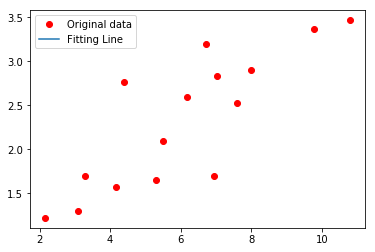

In [37]:
model.eval()

predict = model(Variable(x_train))

predict = predict.data.numpy()

plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')

plt.plot(x_train.numpy(), predict, label='Fitting Line')

# 显示图例

plt.legend() 

plt.show()

In [15]:
# 保存模型

torch.save(model.state_dict(), './linear.pth')